# Analyzing Model Performance

In this assessment, we will load a dataset and train a logistic regression classifier to measure the performance. We'll be using the [Statlog Shuttle](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Shuttle%29) dataset from UCI.

## The dataset

Each record contains nine numerical attributes. The 10th column is the target column. There are two classes to predict; they are called `positive` and `negative`.

### 1. Import necessary packages

For this exercise, we will use the following packages:

 - pandas
 - train_test_split
 - LogisticRegression
 - pyplot from matplotlib
 - KNeighborsClassifier
 - LogisticRegressionClassifier
 - RandomForestClassifier
 - DummyClassifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### 2. Load and prepare the dataset


1.   Load the training data into a dataframe named `df_train_data`.
2.   Create binary classification problem; rename some class labels. I.e., if the multiclass response has 7 outcomes, encoded 1, 2, 3....6, 7; assume our binary classification goal is to predict whether the outcome is "1" or "not 1" (i.e. 2, 3,...6, 7).
3.   Create a DataFrame of nine features named `X`, drop column 9
4.   Create a DataFrame of labels named `y`, select only column 9.
5.   Split the data into a training set and a test set. We recommend using sklearn's `train_test_split()` function.

In [2]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')
df_train_data[9] = np.where(df_train_data[9] == 1, 1, 0) # create binary classification problem
X = df_train_data.drop([9],axis=1)
y = df_train_data[9]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('There are {:d} training samples and {:d} test samples.'.format(X_train.shape[0], X_test.shape[0]))

There are 10875 training samples and 3625 test samples.


In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8
5246,49,2,88,0,46,-3,39,41,2
2944,55,0,92,-2,10,0,37,82,46
6633,56,-1,96,0,54,2,40,42,2
1721,40,0,84,5,38,0,44,45,2
2128,45,4,86,0,46,25,41,40,0


### 3. Create the model

1. Instantiate a logistic regression classifier with an lbfgs solver.
2. Fit the classifier to the data.


In [4]:
lr = LogisticRegression(solver='lbfgs',max_iter=1000)
lr.fit(X_train, y_train)
lr.coef_

array([[ 8.35819788e-02,  2.11085807e-03, -1.68654768e-01,
         2.96556028e-02, -4.31267328e-01, -2.78016434e-04,
         9.82981984e-01, -8.68307106e-01,  2.27419573e-01]])

### 4. Calculate and print the accuracy of the model on the test data.

In [5]:
lr_score = lr.score(X_test, y_test)
print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.966


### 5. Dummy classifier

Use the *dummy classifier* to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

In [6]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7939310344827586

Our logistic regression classifier scored significantly higher than a dummy classifier.

###  6. Confusion matrix

Print the confusion matrix.

In [7]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[2832   46]
 [  79  668]]


### 7. Plot a nicer confusion matrix

Use the `plot_confusion_matrix()` function from above to plot a nicer-looking confusion matrix.

In [8]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

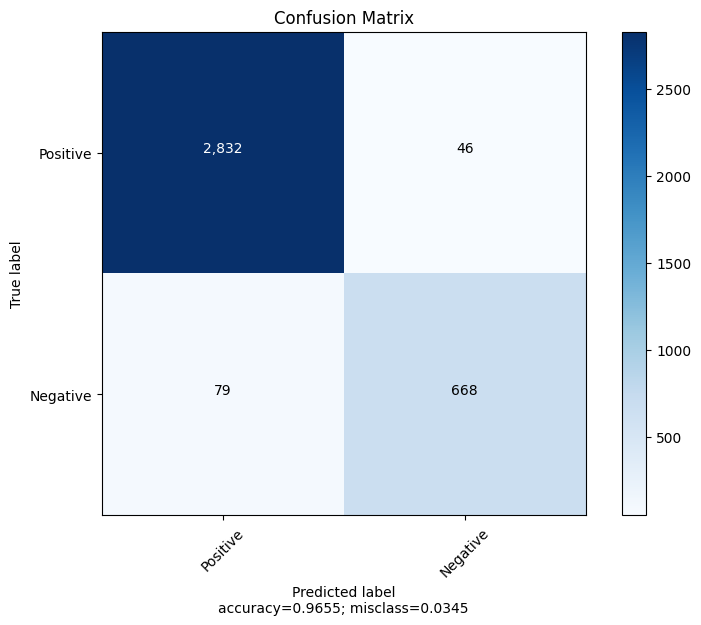

In [9]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

### 8. Calculate metrics

Print the $F_1$, $F_{\beta}$, precision, recall and accuracy scores.

In [10]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.97
Precision score: 0.97
Recall score: 0.98
F1 score: 0.98
Fbeta score favoring precision: 0.98
FBeta score favoring recall: 0.98


### 9. Print a classification report

In [11]:
report = classification_report(y_test, predictions, target_names=['Positive', 'Negative'])
print(report)

              precision    recall  f1-score   support

    Positive       0.94      0.89      0.91       747
    Negative       0.97      0.98      0.98      2878

    accuracy                           0.97      3625
   macro avg       0.95      0.94      0.95      3625
weighted avg       0.97      0.97      0.97      3625



### 10. Plot the ROC curve and AUC

Calculate AUC and plot the curve.

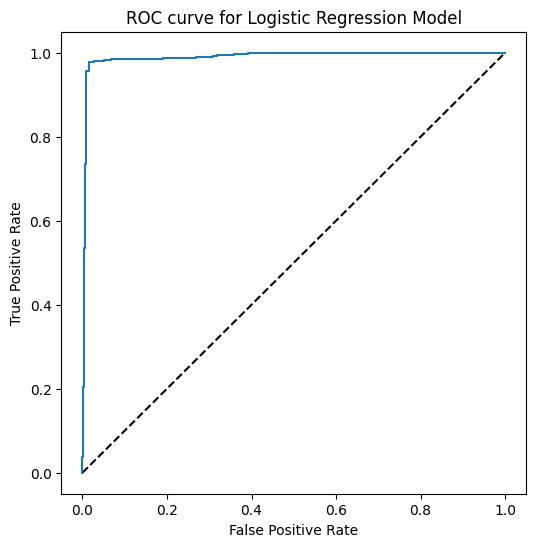

In [12]:
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

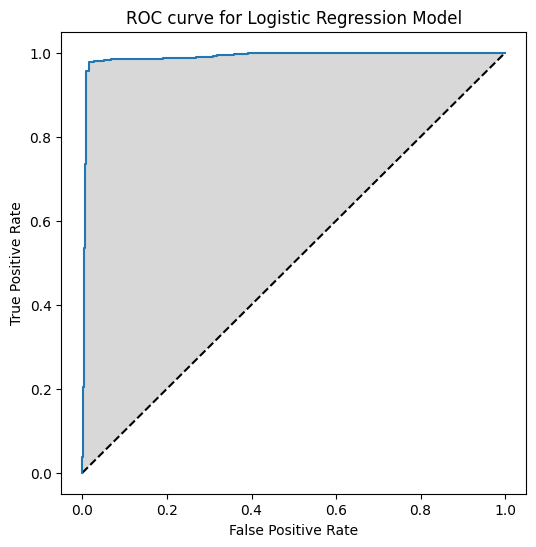

Area under the ROC curve: 0.990


In [13]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

### 11. Plot precision-recall curve

Plot the precision-recall curve for the model above.

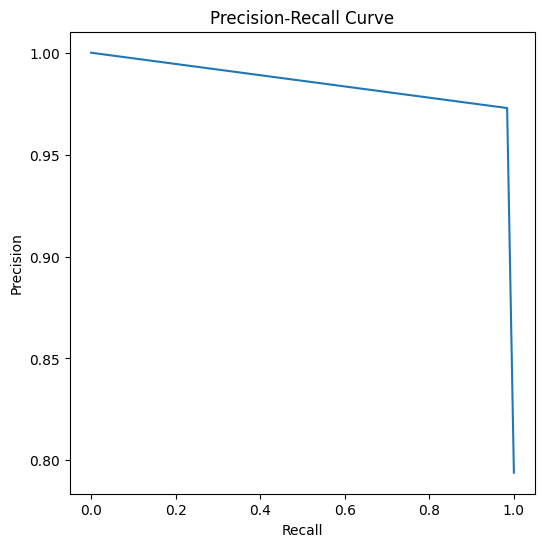

In [14]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### 12. Parameter Tuning

Tune the regularization parameter `C` using grid search. Use an L2 penalty in your model and try values of `C` ranging from `0.05` to `1.5` in increments of `0.05` (but otherwise use the same solver and maximum iterations as before). Print out the value of `C` that produces the best test set accuracy score.

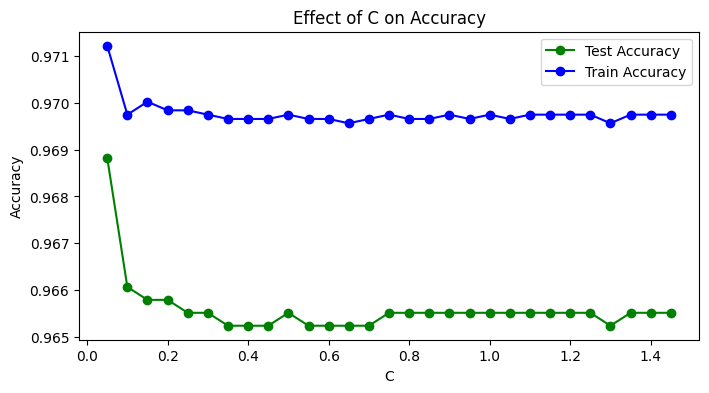

In [15]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', marker = "o", label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', marker = "o", label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [16]:
best_test_accuracy = max(test_accuracy)

print(f"Best value for C: {round(c_vals[test_accuracy.index(best_test_accuracy)],2)}")
print(f"Best test accuracy: {round(best_test_accuracy, 3)}")

Best value for C: 0.05
Best test accuracy: 0.969


Alternatively, tune the regularization parameter `C` using grid search. Use an L2 penalty in your model and try values of `C` ranging from `0.01` to `0.5` in increments of `0.01` (but otherwise use the same solver and maximum iterations as before). Print out the value of `C` that produces the best test set accuracy score.

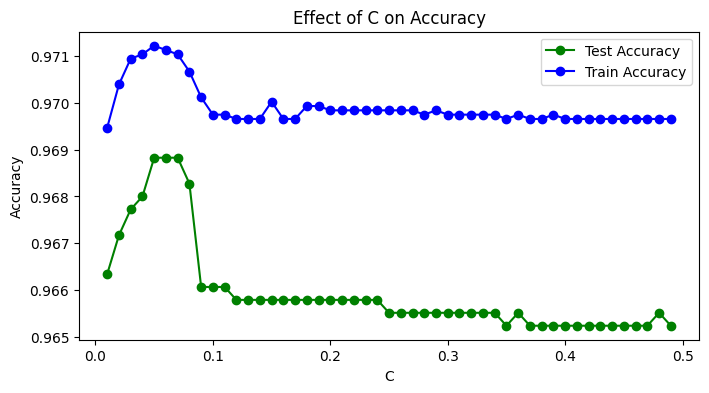

In [17]:
c_vals = np.arange(0.01, 0.5, 0.01)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', marker = "o", label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', marker = "o", label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [18]:
best_test_accuracy = max(test_accuracy)

print(f"Best value for C: {round(c_vals[test_accuracy.index(best_test_accuracy)],2)}")
print(f"Best test accuracy: {round(best_test_accuracy, 3)}")

Best value for C: 0.05
Best test accuracy: 0.969


### 12. Cross-validation

Perform five fold cross-validation for a logistic regression classifier. Print the five accuracy scores and the mean validation score.

In [19]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.97425287 0.96689655 0.96827586 0.96551724 0.97195402]
Mean cross-validation score: 0.969


### 13. Is this really linear?

Your linear classifier is not giving you better accuracy than the dummy classifier. Suppose that the data was not linearly separable. Instantiate and train a KNN model with `k = 7`. How does the accuracy of the KNN model compare to the logistic regression from above? What does that tell you about the data?

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model
knn.fit(X_train, y_train)

# How well did it do?
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.997


The KNN model did significantly better than logistic regression suggesting that the data may be non-linear.

### 14. Random forest

Next, instantiate and fit a random forest classifier and calculate the accuracy of that model.

In [21]:
rf = RandomForestClassifier(n_estimators = 22)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 0.999


The results of the random forest classifier further confirm that the data may be non-linear.